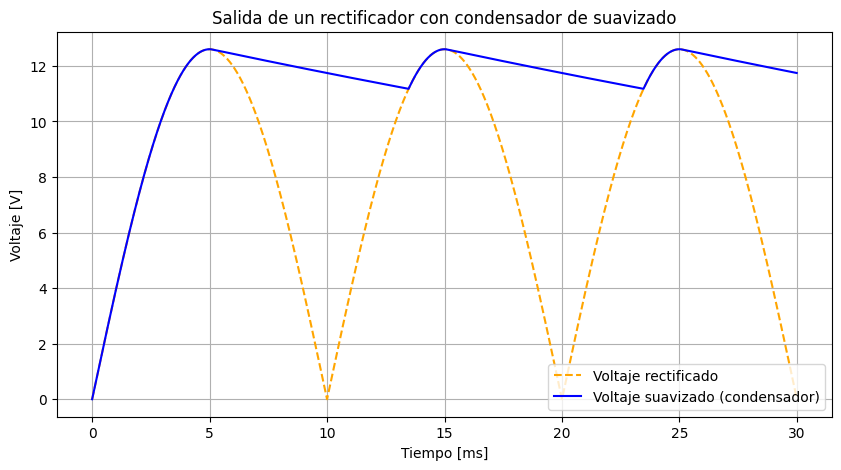

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del circuito
V_peak = 12.6           # Voltaje pico del transformador [V]
f = 50                   # Frecuencia de la red [Hz]
R = 70             # Resistencia de carga [Ohm]
C = 1000e-6              # Capacitancia [F]
Tcarga = 2.6e-3          # Tiempo de conducción del diodo [s]

# Simulación
T = 1/f                   # Periodo de la señal de entrada
T_rect = T/2              # Periodo de la onda rectificada (onda completa)
t = np.arange(0, 3*T_rect, 1e-5)  # Simular 3 ciclos de la onda rectificada

# Voltaje sinusoidal de entrada del transformador
v_in = V_peak * np.sin(2*np.pi*f*t)

# Rectificador de onda completa (valor absoluto)
v_rect = np.abs(v_in)

# Inicializamos la salida del condensador
v_out = np.zeros_like(t)
v_prev = 0

for i in range(len(t)):
    # Si el voltaje rectificado es mayor que el del condensador, el diodo conduce
    if v_rect[i] > v_prev:
        v_prev = v_rect[i]  # carga rápida del condensador
    else:
        # descarga exponencial a través de R
        dv = -(v_prev / (R*C)) * (t[1]-t[0])
        v_prev += dv
    v_out[i] = v_prev

# Graficar
plt.figure(figsize=(10,5))
plt.plot(t*1000, v_rect, '--', color='orange', label='Voltaje rectificado')
plt.plot(t*1000, v_out, color='blue', label='Voltaje suavizado (condensador)')
plt.title('Salida de un rectificador con condensador de suavizado')
plt.xlabel('Tiempo [ms]')
plt.ylabel('Voltaje [V]')
plt.grid(True)
plt.legend()